<a href="https://colab.research.google.com/github/harisonmg/tensorflow-exam-prep/blob/main/notebooks/BBC_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Getting the data

In [1]:
#@title Imports
from pathlib import Path

import pandas as pd

In [2]:
#@title Config
DATASET = {
    "url":  "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv",
    "local": "bbc-text.csv",
    "target": "category"
}


BASE_DIR = Path(".")
data_file_path = BASE_DIR / DATASET["local"]

In [3]:
#@title Downloading and extracting the data
dataset_url = DATASET["url"]
dataset_download = DATASET["local"]
target = DATASET["target"]

!wget --no-check-certificate {dataset_url} -O {dataset_download}


--2021-08-17 10:33:11--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.127.128, 172.217.218.128, 142.250.153.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.127.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [text/csv]
Saving to: ‘bbc-text.csv’

bbc-text.csv        100%[===================>]   4.82M  --.-KB/s    in 0.04s   

2021-08-17 10:33:12 (133 MB/s) - ‘bbc-text.csv’ saved [5057493/5057493]



In [4]:
#@title Previewing the data
bbc_news = pd.read_csv(data_file_path)
bbc_news.head(10)

# testing
assert bbc_news.shape[0] == 2225

## Stopword removal

In [5]:
#@title Stopwords
STOPWORDS = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

num_stopwords = len(STOPWORDS)
assert num_stopwords == 153
print(f"Number of stopwords: {num_stopwords}")

Number of stopwords: 153


In [6]:
#@title Helper functions
def remove_stopwords(string, stopwords=None):
    if stopwords is not None:
        cleaned_string = " ".join([word for word in string.split() if word not in stopwords])
        return cleaned_string
    return string

def remove_stopwords_from_df(df, text_cols, stopwords=None):
    clean_df = df.copy()
    for col in text_cols:
        clean_df[col] = clean_df[col].apply(remove_stopwords, stopwords=stopwords)
    return clean_df

In [7]:
#@title Removing stopwords
clean_bbc_news = remove_stopwords_from_df(
    bbc_news, text_cols=["text"], stopwords=STOPWORDS
)

# testing
first_clean_report = clean_bbc_news.loc[0, "text"]
clean_report = "tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well brand identity viewer loyalty channels. although us leads technology moment also concern raised europe particularly growing uptake services like sky+. happens today will see nine months years time uk adam hume bbc broadcast s futurologist told bbc news website. likes bbc no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters brand loyalty important everyone. will talking content brands rather network brands said tim hanlon brand communications firm starcom mediavest. reality broadband connections anybody can producer content. added: challenge now hard promote programme much choice. means said stacey jolna senior vice president tv guide tv group way people find content want watch simplified tv viewers. means networks us terms channels take leaf google s book search engine future instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands mr hanlon suggested. end kids just diapers pushing buttons already - everything possible available said mr hanlon. ultimately consumer will tell market want. 50 000 new gadgets technologies showcased ces many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies directtv even launched branded dvr show 100-hours recording capability instant replay search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo called tivotogo means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want want."
assert first_clean_report == clean_report
print(f"First item:\n {first_clean_report}")

First item:
 tv future hands viewers home theatre systems plasma high-definition tvs digital video recorders moving living room way people watch tv will radically different five years time. according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend programmes content will delivered viewers via home networks cable satellite telecoms companies broadband service providers front rooms portable devices. one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes like us s tivo uk s sky+ system allow people record store play pause forward wind tv programmes want. essentially technology allows much personalised tv. also built-in high-definition tv sets big business japan us slower take off europe lack high-definition programming. not can people forward wind adverts can also forget abiding network channel schedules putting together a-la-carte entertainment. us networks 

## Splitting the data

In [8]:
#@title Imports
from sklearn.model_selection import train_test_split
import numpy as np

In [9]:
#@title Helper function
def train_val_test_split(data, train_size=0.7, test_split=False, random_state=42):
    subsets = ["training", "validation", "test"]
    if not test_split:
        subsets.remove("test")

    # split
    train_data, val_data = train_test_split(
        data, train_size=train_size, random_state=random_state
    )
    if test_split:
        val_data, test_data = train_test_split(
            val_data, train_size=train_size, random_state=random_state
        )
        data_subsets = [train_data, val_data, test_data]
    else:
        data_subsets = [train_data, val_data]
        
    # test
    subset_lengths = [subset.shape[0] for subset in data_subsets]
    assert sum(subset_lengths) == data.shape[0]
    return dict(zip(subsets, data_subsets))

In [10]:
#@title Create train, validation and test splits
data_subsets = train_val_test_split(clean_bbc_news, train_size=0.8, test_split=False)
for name, data in data_subsets.items():
    formatting = "\n" + "-"*6 + " "*2
    print(f"{formatting} {name.title()} data {formatting[::-1]}")
    display(data[target].value_counts())

train_data, validation_data = data_subsets.values()
# tests
assert train_data.shape[0] == 1780
assert validation_data.shape[0] == 445


------   Training data   ------



sport            413
business         409
politics         334
tech             319
entertainment    305
Name: category, dtype: int64


------   Validation data   ------



business         101
sport             98
politics          83
tech              82
entertainment     81
Name: category, dtype: int64

## Tokenization

In [11]:
#@title Imports
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
#@title Config
vocab_size = 10000
embedding_dim = 16
max_length = 120
trunc_type = "post"
padding_type = "post"
oov_token = "<OOV>"

In [13]:
#@title Tokenize and pad sequences
# tokenize text
tokenizer = Tokenizer(vocab_size, oov_token=oov_token)
tokenizer.fit_on_texts(train_data["text"])
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_data["text"])
train_padded = pad_sequences(
    train_sequences,
    maxlen=max_length,
    padding=padding_type,
    truncating=trunc_type
)
validation_sequences = tokenizer.texts_to_sequences(validation_data["text"])
validation_padded = pad_sequences(
    validation_sequences,
    maxlen=max_length,
    padding=padding_type,
    truncating=trunc_type
)

# tokenize labels
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(train_data[target])

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_data[target]))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_data[target]))

## Model training

In [14]:
#@title Imports
from datetime import datetime

from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import callbacks, layers, models, optimizers
import tensorflow as tf

print(f"Tensorflow: {tf.__version__}")

Tensorflow: 2.5.0


In [15]:
#@title Config
BATCH_SIZE = 32
IMAGE_SIZE = (150, 150)
IMAGE_SHAPE = IMAGE_SIZE + (3,)
MODEL_LOGS_DIR = BASE_DIR / f"{Path(dataset_download).stem}_model"

epochs = 200
learning_rate = 1e-3
early_stopping_rounds = 3

current_logs_dir = MODEL_LOGS_DIR / datetime.now().isoformat()
checkpoint_filepath = current_logs_dir / "checkpoints"
tensorboard_logs_dir = current_logs_dir / "logs"

model_log_paths = [checkpoint_filepath, tensorboard_logs_dir]
for path in model_log_paths:
    if not path.exists():
        path.mkdir(parents=True)
        print(f"Created: {path}")

Created: bbc-text_model/2021-08-17T10:33:17.915054/checkpoints
Created: bbc-text_model/2021-08-17T10:33:17.915054/logs


In [16]:
#@title Model definition
model = models.Sequential([
    layers.Embedding(
        input_dim=vocab_size,
        output_dim=embedding_dim,
        input_length=max_length
    ),
    layers.GlobalAveragePooling1D(),
    layers.Dense(24, activation="relu"),
    layers.Dense(6, activation="softmax")
])

model.compile(
    optimizer=optimizers.Adam(learning_rate=learning_rate),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 120, 16)           160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 24)                408       
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 150       
Total params: 160,558
Trainable params: 160,558
Non-trainable params: 0
_________________________________________________________________


In [17]:
#@title Model callbacks
class CustomCallback(callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    threshold = 0.95
    if(logs.get("val_accuracy") > threshold):
      print(f"\nReached {threshold:.1%} accuracy so cancelling training!")
      self.model.stop_training = True

model_callbacks = [
             CustomCallback(),
             callbacks.ModelCheckpoint(filepath=checkpoint_filepath),
             callbacks.EarlyStopping(patience=early_stopping_rounds),
             callbacks.TensorBoard(tensorboard_logs_dir)
]

In [18]:
#@title Training the model
history = model.fit(
    train_padded,
    training_label_seq,
    epochs=epochs,
    verbose=1,
    validation_data=(validation_padded, validation_label_seq),
    callbacks=model_callbacks
)

Epoch 1/200
56/56 [==============================] - 1s 9ms/step - loss: 1.7504 - accuracy: 0.4371 - val_loss: 1.6979 - val_accuracy: 0.4674
INFO:tensorflow:Assets written to: bbc-text_model/2021-08-17T10:33:17.915054/checkpoints/assets
Epoch 2/200
56/56 [==============================] - 0s 5ms/step - loss: 1.6176 - accuracy: 0.5567 - val_loss: 1.5410 - val_accuracy: 0.5775
INFO:tensorflow:Assets written to: bbc-text_model/2021-08-17T10:33:17.915054/checkpoints/assets
Epoch 3/200
56/56 [==============================] - 0s 6ms/step - loss: 1.3903 - accuracy: 0.7146 - val_loss: 1.2869 - val_accuracy: 0.7393
INFO:tensorflow:Assets written to: bbc-text_model/2021-08-17T10:33:17.915054/checkpoints/assets
Epoch 4/200
56/56 [==============================] - 0s 6ms/step - loss: 1.0574 - accuracy: 0.8792 - val_loss: 0.9660 - val_accuracy: 0.8989
INFO:tensorflow:Assets written to: bbc-text_model/2021-08-17T10:33:17.915054/checkpoints/assets
Epoch 5/200
56/56 [==============================] -

## Model evaluation

In [19]:
#@title Imports
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_theme(style="whitegrid")

In [20]:
#@title Helper function
def get_metrics(training_history, metric, validation=True):
    metrics = {
        metric: training_history.get(metric)
    }
    if validation:
        val_metric = "val_" + metric
        metrics[val_metric] = training_history.get(val_metric)
    return pd.DataFrame(metrics)

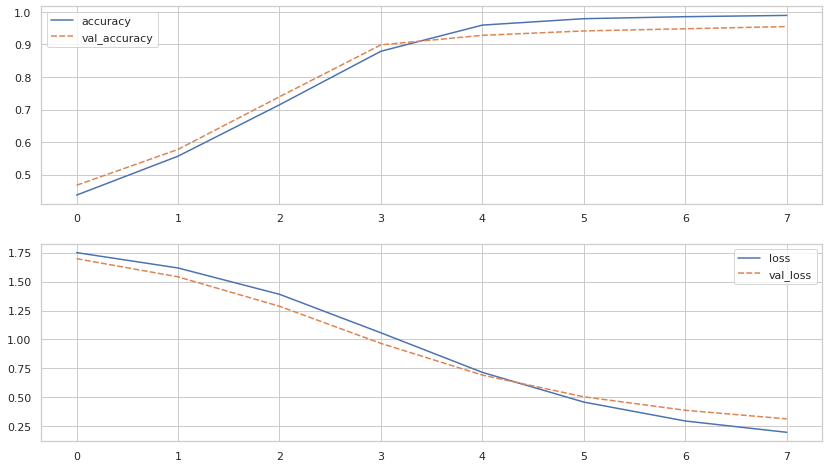

In [21]:
#@title Plot training metrics
rows, cols = 2, 1
fig, axes = plt.subplots(rows, cols, figsize=(7*rows, 8*cols))

accuracy = get_metrics(history.history, "accuracy")
loss = get_metrics(history.history, "loss")
sns.lineplot(data=accuracy, ax=axes[0])
sns.lineplot(data=loss, ax=axes[1])
plt.show()

In [22]:
# %load_ext tensorboard
# %tensorboard --logdir={tensorboard_logs_dir}

## Testing the model

In [23]:
reverse_word_index = dict(zip(word_index.values(), word_index.keys()))

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

In [24]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(10000, 16)


In [25]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
    word = reverse_word_index[word_num]
    embeddings = weights[word_num]
    out_m.write(word + "\n")
    out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [26]:
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

## Saving the model to Google Drive

In [27]:
#@title Copy the model checkpoints and logs to Google Drive
from google.colab import drive

drive.mount('/content/drive')
google_drive_folder = "/content/drive/MyDrive/tensorflow"

!mkdir {google_drive_folder}
!cp -r {MODEL_LOGS_DIR} {google_drive_folder}

Mounted at /content/drive
mkdir: cannot create directory ‘/content/drive/MyDrive/tensorflow’: File exists
